<a href="https://colab.research.google.com/github/LucasNatalePires/kaggle_Spaceship-Titanic/blob/main/Space_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The [train.csv](https://github.com/LucasNatalePires/kaggle_Spaceship-Titanic/blob/main/train.csv) and [test.csv](https://github.com/LucasNatalePires/kaggle_Spaceship-Titanic/blob/main/test.csv) files are available in the repository or can be downloaded from the kaggle website, at this link [data](https://www.kaggle.com/competitions/spaceship-titanic/data)**

In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Getting to know our dataset

In [100]:
train = pd.read_csv("/content/train.csv")
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [101]:
test = pd.read_csv("/content/test.csv")
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [104]:
#Checking the amount of different data in each column
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [105]:
#Checking the amount of different data in each column
test.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

In [106]:
#Checking the null values
pd.isnull(train).sum().sort_values(ascending = False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [107]:
#Checking the null values
pd.isnull(test).sum().sort_values(ascending = False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [108]:
#'Cabin' is confusing, and to improve the accuracy of our project.
#I'll create 3 columns, separating it by 'deck', 'num' and side.
train[['Cab_Deck','Cab_Num','Cab_Side']] = train.Cabin.str.split('/',expand=True)
test[['Cab_Deck','Cab_Num','Cab_Side']] = test.Cabin.str.split('/',expand=True)


#Deleting 'Cabin'
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)

In [109]:
#Treating the null values

#Treating the floats values, using the mean()
paidColumns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in paidColumns:
  train[i].fillna(train[i].mean(),inplace=True)
  test[i].fillna(train[i].mean(),inplace=True)

#Treating the strins values,where is possible to use the mode()
othColumns = ['Destination','HomePlanet','VIP','CryoSleep']
for o in othColumns:
  train[o].fillna(train[o].mode()[0],inplace=True)
  test[o].fillna(test[o].mode()[0],inplace=True)

 #Treating column age using median()
ageColumns = ['Age']
for a in ageColumns:
  train[a].fillna(train[a].median(),inplace=True)
  test[a].fillna(test[a].median(),inplace=True)

#Deleting column 'name'
train = train.drop(['Name'],axis=1)
test = test.drop(['Name'],axis=1)

In [110]:
train.Cab_Side.value_counts()

S    4288
P    4206
Name: Cab_Side, dtype: int64

In [111]:
test.Cab_Side.value_counts()

S    2093
P    2084
Name: Cab_Side, dtype: int64

In [112]:
#Treating null values
cab_Side_col = ['Cab_Side']
for cas in cab_Side_col:
    train[cas].fillna(train[cas].mode()[0],inplace=True)
    test[cas].fillna(test[cas].mode()[0],inplace=True)

In [113]:
# There is no way to now about the decks, for this reason, all the null values will be a new Letter, H.
train.Cab_Deck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cab_Deck, dtype: int64

In [114]:
#Treating the datas, creating the new deck 'H'
train['Cab_Deck'].fillna('H',inplace=True)
test['Cab_Deck'].fillna('H',inplace=True)

**There are many possible numbers, therefore, the best way to work with average is using mean(), but to do so, it is necessary to transform this column whose dtype = int into float and thus give continuity**

In [115]:
train.Cab_Num.value_counts(ascending=False)

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cab_Num, Length: 1817, dtype: int64

In [116]:
#Converting the type of those columns
train['Cab_Num'] =train['Cab_Num'].astype(float)
test['Cab_Num'] =test['Cab_Num'].astype(float)

In [117]:
#Treating the null values using median()
train['Cab_Num'].fillna(train['Cab_Num'].median().round(),inplace=True)
test['Cab_Num'].fillna(train['Cab_Num'].median().round(),inplace=True)

In [118]:
#Checking if all the null values are treated
pd.isnull(train).sum().sort_values(ascending = False)

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cab_Deck        0
Cab_Num         0
Cab_Side        0
dtype: int64

In [119]:
#Checking if all the null values are treated
pd.isnull(test).sum().sort_values(ascending = False)

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cab_Deck        0
Cab_Num         0
Cab_Side        0
dtype: int64

In [120]:
#Showing train with those changes
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cab_Deck,Cab_Num,Cab_Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S


In [121]:
#Checking the amount of different data in each column
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1274
FoodCourt       1508
ShoppingMall    1116
Spa             1328
VRDeck          1307
Transported        2
Cab_Deck           9
Cab_Num         1817
Cab_Side           2
dtype: int64

For my model work properly, I need to transform some Boolean values into numbers, and for this I will use [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). If it is a binary decision, 1 or 0, a simple function solves the problem

In [122]:
#Converting 'Cab_Side', 'VIP' and 'CryoSleep' in binary
train['Cab_Side'] = train.Cab_Side.apply(lambda x:1 if x=='S' else 0)
test['Cab_Side'] = test.Cab_Side.apply(lambda x:1 if x=='S' else 0)

#Converting 'VIP' and 'CryoSleep' in binary
train['VIP'] = train.VIP.apply(lambda x:1 if x ==True else 0)
test['VIP'] = test.VIP.apply(lambda x:1 if x==True else 0)

train['CryoSleep'] = train.CryoSleep.apply(lambda x:1 if x==True else 0)
test['CryoSleep'] = test.CryoSleep.apply(lambda x:1 if x==True else 0)

#Checking the new values
test[['VIP','CryoSleep']].value_counts()

VIP  CryoSleep
0    0            2666
     1            1537
1    0              67
     1               7
dtype: int64

Now the columns that can be given, more than 2 options

 In this case, I am not using the same reasoning as above, but also inserting 2, as this gives the algorithm an idea of ​​order, hierarchy, which is not the case, considering that we do not know the itinerary, where the first stop was. to pick up passengers, etc

 **It's time to use the [OneHotEncoder]((https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html))**

In [123]:
#Checking the possibles values
train['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [124]:
#Creating the encoder and fit with data
enc = OneHotEncoder(handle_unknown='ignore', dtype ='int32').fit(train[['Destination']])

#Transforming the data
enc.transform(train[['Destination']]).toarray()

#Transforming the array into dataFrame
enc_df = pd.DataFrame(enc.transform(train[['Destination']]).toarray(), columns = (['DEST_TRAPPIST','DEST_55_CA','DEST_PSO']))

#Add these new columns to train
train=pd.concat([train,enc_df],axis=1)

#Deleting 'Destination'
train = train.drop(['Destination'],axis=1)


########################### Now with Test DataFrame  ####################################

#Creating the encoder and fit with data
enc = OneHotEncoder(handle_unknown='ignore', dtype ='int32').fit(test[['Destination']])

#Transforming the data
enc.transform(test[['Destination']]).toarray()

#Transforming the array into dataFrame
enc_df = pd.DataFrame(enc.transform(test[['Destination']]).toarray(), columns = (['DEST_TRAPPIST','DEST_55_CA','DEST_PSO']))

#Add these new columns to train
test=pd.concat([test,enc_df],axis=1)

#Deleting 'Destination'
test = test.drop(['Destination'],axis=1)

In [125]:
#Showing the possible values from this column
train['HomePlanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [126]:
#Creating the encoder and fit with data
enc = OneHotEncoder(handle_unknown='ignore', dtype ='int32').fit(train[['HomePlanet']])

#Transforming the data
enc.transform(train[['HomePlanet']]).toarray()

#Transforming the array into dataFrame
enc_df = pd.DataFrame(enc.transform(train[['HomePlanet']]).toarray(), columns = (['HP_Earth','HP_Europa' ,'HP_Mars']))

#Add these new columns to test
train=pd.concat([train,enc_df],axis=1)

#Deleting 'HomePlanet'
train = train.drop(['HomePlanet'],axis=1)

########################### Now with Test DataFrame  ####################################

#Creating the encoder and fit with data
enc = OneHotEncoder(handle_unknown='ignore', dtype ='int32').fit(test[['HomePlanet']])

#Transforming the data
enc.transform(test[['HomePlanet']]).toarray()

#Transforming the array into dataFrame
enc_df = pd.DataFrame(enc.transform(test[['HomePlanet']]).toarray(), columns = (['HP_Earth','HP_Europa' ,'HP_Mars']))

#Add these new columns to test
test=pd.concat([test,enc_df],axis=1)

#Deleting 'HomePlanet'
test = test.drop(['HomePlanet'],axis=1)

**To work with the 'Cab_Num' column, another approach is necessary, as there are several options, and they are more efficient than OneHotEncoder. To do this, we will use [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). It will be responsible for easily encoding your categorical data and preparing it for further analysis or input into machine learning algorithms**

In [127]:
#Using the Label Encoder
le = LabelEncoder()
train['Cab_Deck'] = le.fit_transform(train['Cab_Deck'])
test['Cab_Deck'] = le.fit_transform(test['Cab_Deck'])

In [128]:
#Showing train with those changes
train.head(5)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cab_Deck,Cab_Num,Cab_Side,DEST_TRAPPIST,DEST_55_CA,DEST_PSO,HP_Earth,HP_Europa,HP_Mars
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0.0,0,0,0,1,0,1,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0.0,1,0,0,1,1,0,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0.0,1,0,0,1,0,1,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0.0,1,0,0,1,0,1,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1.0,1,0,0,1,1,0,0


In [129]:
test.head(5)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab_Deck,Cab_Num,Cab_Side,DEST_TRAPPIST,DEST_55_CA,DEST_PSO,HP_Earth,HP_Europa,HP_Mars
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3.0,1,0,0,1,1,0,0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4.0,1,0,0,1,1,0,0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0.0,1,1,0,0,0,1,0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1.0,1,0,0,1,0,1,0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5.0,1,0,0,1,1,0,0


# Data processing/adequacy is ok. Now, with the help of graphs, I will see our data from another perspective, and also, to check if there are any scale problems, a factor that can reduce the accuracy of our algorithm

To use the graphs, use the libraries [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) and [sea born](https://seaborn.pydata.org/tutorial/categorical.html). To apply the necessary changes to improve the accuracy of the algorithm, I will use [Standart Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). There are other libraries to solve the scaling problem, but in this case, I chose the one that has more advantages than the others, they are:
  - Easy to implement and works fast
  - Because it doesn't have so many outliers, it doesn't present a major disadvantage

In [130]:
#Showing the columns from train dataFrame
train.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cab_Deck', 'Cab_Num',
       'Cab_Side', 'DEST_TRAPPIST', 'DEST_55_CA', 'DEST_PSO', 'HP_Earth',
       'HP_Europa', 'HP_Mars'],
      dtype='object')

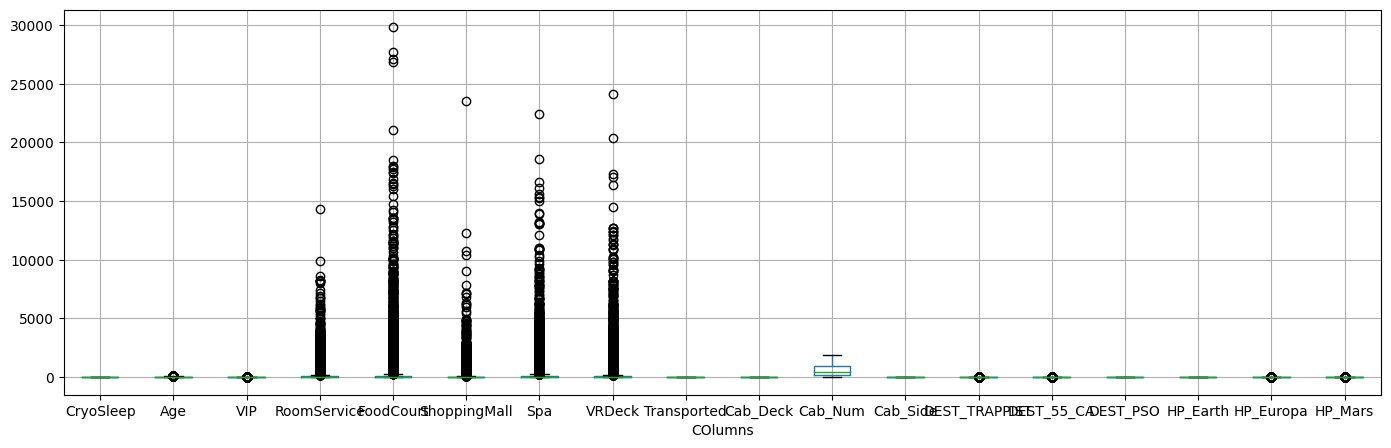

In [131]:
# Creating a graph to visualize whether all values ​​are on similar scales
train.boxplot(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cab_Deck', 'Cab_Num',
       'Cab_Side', 'DEST_TRAPPIST', 'DEST_55_CA', 'DEST_PSO', 'HP_Earth',
       'HP_Europa', 'HP_Mars'], ax=None, fontsize=10,figsize=(17,5))
plt.xlabel('COlumns')
plt.show()

**Columns related to extra services are out of scale**

In [132]:
# Creating the scaler and fit
scaler = StandardScaler().fit(train[['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']])

# Transforming the data
train[['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = scaler.transform(train[['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']])

In [133]:
train.head(8)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cab_Deck,Cab_Num,Cab_Side,DEST_TRAPPIST,DEST_55_CA,DEST_PSO,HP_Earth,HP_Europa,HP_Mars
0,0001_01,0,39.0,0,-0.340590,-0.287314,-0.290817,-0.276663,-2.690226e-01,False,1,0.0,0,0,0,1,0,1,0
1,0002_01,0,24.0,0,-0.175364,-0.281669,-0.248968,0.211505,-2.301943e-01,True,5,0.0,1,0,0,1,1,0,0
2,0003_01,0,58.0,1,-0.275409,1.955616,-0.290817,5.694289,-2.257820e-01,False,0,0.0,1,0,0,1,0,1,0
3,0003_02,0,33.0,0,-0.340590,0.517406,0.330225,2.683471,-9.870755e-02,False,0,0.0,1,0,0,1,0,1,0
4,0004_01,0,16.0,0,0.118709,-0.243409,-0.038048,0.225732,-2.672577e-01,True,5,1.0,1,0,0,1,1,0,0
5,0005_01,0,44.0,0,-0.340590,0.015632,-0.290817,-0.017907,-2.690226e-01,True,5,0.0,0,0,1,0,1,0,0
6,0006_01,0,26.0,0,-0.276925,0.677974,-0.285795,-0.276663,-2.690226e-01,True,5,2.0,1,0,0,1,1,0,0
7,0006_02,1,28.0,0,-0.340590,-0.287314,-0.290817,-0.276663,-1.003243e-16,True,6,0.0,1,0,0,1,1,0,0


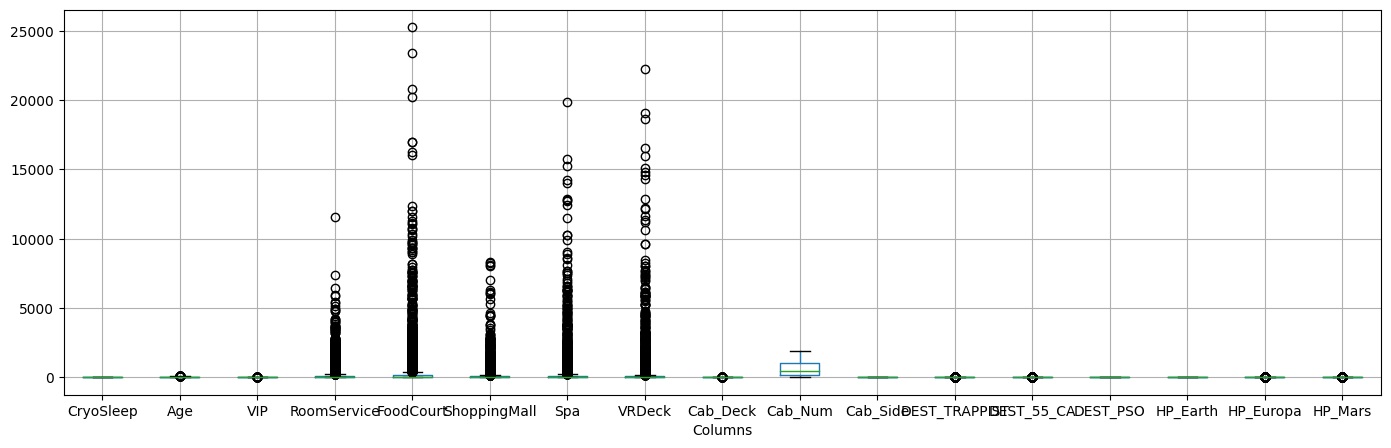

In [134]:
# Creating a graph to visualize whether all values ​​are on similar scales
test.boxplot(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Cab_Deck', 'Cab_Num',
       'Cab_Side', 'DEST_TRAPPIST', 'DEST_55_CA', 'DEST_PSO', 'HP_Earth',
       'HP_Europa', 'HP_Mars'], ax=None, fontsize=10,figsize=(17,5))
plt.xlabel('Columns')
plt.show()

In [135]:
# Creating the scaler and fit
scaler = StandardScaler().fit(test[['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']])

# Transforming the data
test[['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = scaler.transform(test[['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']])

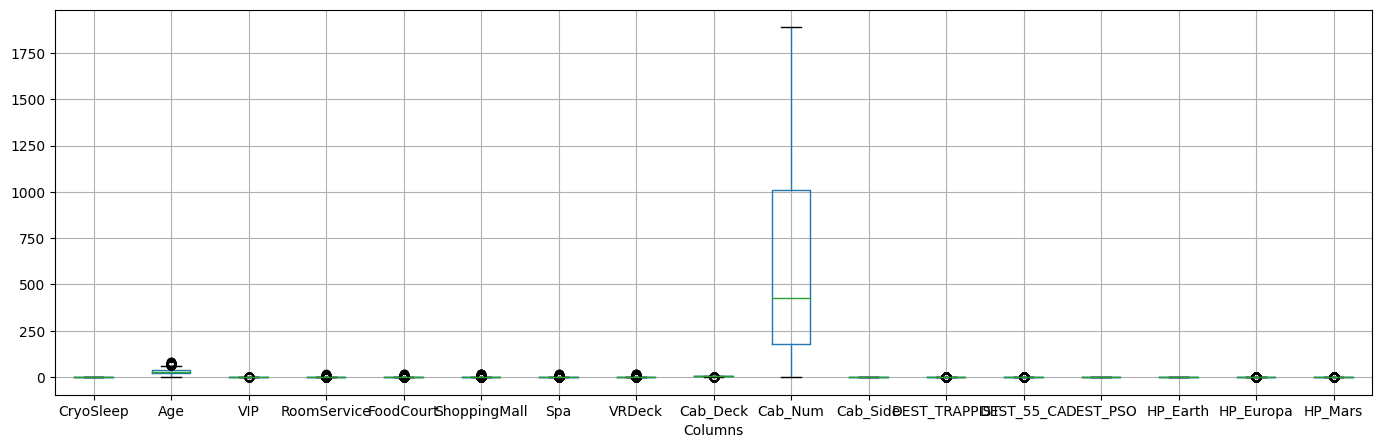

In [136]:
test.boxplot(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Cab_Deck', 'Cab_Num',
       'Cab_Side', 'DEST_TRAPPIST', 'DEST_55_CA', 'DEST_PSO', 'HP_Earth',
       'HP_Europa', 'HP_Mars'], ax=None, fontsize=10,figsize=(17,5))
plt.xlabel('Columns')
plt.show()

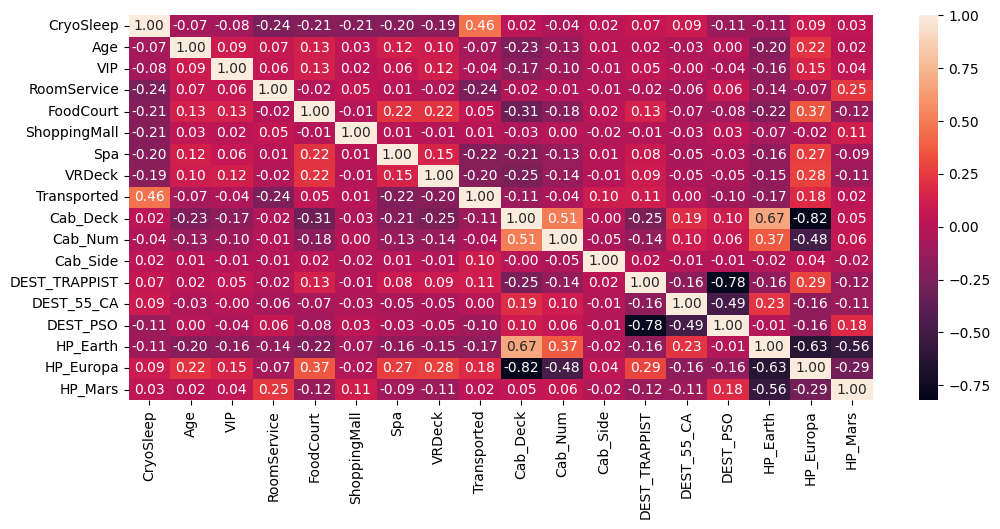

In [137]:
# Creating the heatmap to understand the more important columns
fig, ax = plt.subplots(figsize = (12,5))
sns.heatmap(train.corr(),annot=True, fmt=".2f")
plt.show()

The intention of creating this heatmap is to check if there are any columns that have a strong relationship with and that we can explore, but no relevant relationship was found

# With the data on the same scale, I will try to use some algorithms and try to achieve the best possible accuracy

I used [Train test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to divide the amount of data used to train and test the algorithm

[Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to determine the accuracy, considering that it is the criterion of the challenge

[Confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to visualize the hits/errors in the respective quadrants

In [138]:
#Relational imports to algorithms and test models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [139]:
#Separating the training base into X and y
X = train.drop(['PassengerId','Transported'],axis = 1)
y = train.Transported
#Separate train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y,test_size=0.2, random_state=42)

The algorithms used were:

  **[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

  **[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**

  **[MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)**

In [140]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression

#Creating the classifier and fit with data
clf_lr = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

#Making the predict
y_pred_lr = clf_lr.predict(X_validation)

#Logistic Regression Accuracy
accuracy_score(y_validation, y_pred_lr)

0.7809085681426107

In [141]:
#Logistic Regression Confusion Matrix
confusion_matrix(y_validation, y_pred_lr)

array([[635, 226],
       [155, 723]])

# Logistic Regression **accuracy** on kaggle score: 0.79424

In [142]:
from sklearn.ensemble import RandomForestClassifier

#Creating the classifier and fit with the data
clf_rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

#Making the predict
y_pred_rf = clf_rf.predict(X_validation)

#Random Forest Accuracy
accuracy_score(y_validation,y_pred_rf)

0.7947096032202415

In [143]:
#Random Forest Confusion Matrix
confusion_matrix(y_validation,y_pred_rf)

array([[698, 163],
       [194, 684]])

# Random Forest **accuracy** on kaggle score: 0.79237

In [144]:
from sklearn.neural_network import MLPClassifier

#Creating the classifier and fit with datas
clf_mlp = MLPClassifier(random_state=42, max_iter=5000).fit(X_train, y_train)

#Making the predction
y_pred_mlp = clf_mlp.predict(X_validation)

#Mlp Classifier Accuracy
accuracy_score(y_validation, y_pred_mlp)

0.7763082231167338

In [145]:
#Confusion Matrix Mlp Classifier
confusion_matrix(y_validation, y_pred_mlp)

array([[681, 180],
       [209, 669]])

#MLP Classifier **accuracy** on Kaggle Score: 0.78559

The result was not bad, but I will try to improve the accuracy, using [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to divide the dataFrames into pieces and o [Grid Search](https://scikit-learn.org/stable/modules/grid_search.html) testing all possible combinations, and applying these libraries to the algorithmic models used above

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings

#This function allows you to ignore all warnings, which makes the file more visual
warnings.filterwarnings('ignore')


from datetime import datetime
def hour():
  hour_now = datetime.now()
  print(str(hour_now.hour)+':'+str(hour_now.minute)+':'+str(hour_now.second))

In [147]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)

parameters_rf = {
    'n_estimators': [100,250,500,500,1000],
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,4,6,8,None],
    'max_features': ['sqrt','log2',None]
}

hour()
K_Fold_rf = KFold(n_splits=7, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(clf_rf,parameters_rf,scoring='accuracy',cv=K_Fold_rf).fit(X_train, y_train)
hour()

18:0:16
20:4:54


In [148]:
#Checking the best parameters
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 1000}

In [149]:
#Checking the best score
grid_search_rf.best_score_

0.8083129766948691

In [150]:
#Predicting on validation data with each of the best models

#Random Forest
clf_selected_rf = grid_search_rf.best_estimator_
y_pred_rf = clf_selected_rf.predict(X_validation)

In [151]:
#Accuruacy score Random Forest
accuracy_score(y_validation, y_pred_rf)

0.78953421506613

In [152]:
#Confusion Matrix Random Forest
confusion_matrix(y_validation, y_pred_rf)

array([[689, 172],
       [194, 684]])

# Random Forest **accuracy** using Grid on kaggle score: 0.79869  



In [153]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=42)

parameters_lr = {
  'penalty': ['l1','l2'],
  'C':[0.01,0.1,1,10],
  'solver': ['lbfgs','liblinear','sag','saga'],
  'max_iter':[100,1000,5000,10000]
}

hour()
KFold_lr = KFold(n_splits=6, shuffle=True, random_state=42)
Grid_Search_lr = GridSearchCV(clf_lr,parameters_lr,scoring='accuracy',cv=KFold_lr).fit(X_train,y_train)
hour()

20:4:54
20:32:11


In [154]:
#Checking the best parameters
Grid_Search_lr.best_params_

{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

In [155]:
#Checking the best score
Grid_Search_lr.best_score_

0.7975266033937302

In [156]:
#Predicting on validation data with each of the best models

#Logistic Regression
clf_selected_lr = Grid_Search_lr.best_estimator_
y_pred_lr=clf_selected_lr.predict(X_validation)

In [157]:
# Logistic Regression Accuracy
accuracy_score(y_validation, y_pred_lr)

0.777458309373203

In [161]:
#Confusion Matrix Logistic Regression
confusion_matrix(y_validation,y_pred_lr)

array([[631, 230],
       [157, 721]])

# Logistic regression with grid **accuracy** kaggle score: 0.79448

In [162]:
from sklearn.neural_network import MLPClassifier

# Creating the Classifier
clf_mlp = MLPClassifier(random_state=42)

#Creating the parameters
parameters_mlp = {
    'solver': ['lbfgs','sgd','adam'],
    'alpha': [10.0**(-1),10.0**(-5),10.0**(-7),10.0**(-10)],
    'max_iter': [200,500,1000,5000],
}

# Using the K Fold to split the data and the Grid SearchCv to find the best parameters
# The function time() is just to count how long the data is processed
hour()
KFold_mlp = KFold(n_splits=8, random_state=42, shuffle=True)
grid_search_mlp = GridSearchCV(clf_mlp, parameters_mlp,scoring='accuracy',cv=KFold_mlp).fit(X_train, y_train)
hour()

20:56:23
21:42:35


In [163]:
#Checking the best parameters
grid_search_mlp.best_params_

{'alpha': 1e-05, 'max_iter': 5000, 'solver': 'lbfgs'}

In [164]:
#Checking the best score
grid_search_mlp.best_score_

0.800258918296893

In [165]:
#Predicting on validation data with each of the best models

#MlP Classifier
clf_selected_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = clf_selected_mlp.predict(X_validation)

In [166]:
#Mlp Classifier Accuracy
accuracy_score(y_validation, y_pred_mlp)

0.78205865439908

In [167]:
#Confusion Matrix Mlp Classifier
confusion_matrix(y_validation, y_pred_mlp)

array([[643, 218],
       [161, 717]])

# MLP Classifier **accuracy** using Grid Kaggle Score: 0.79611




In [168]:
#Creating and exporting the file with the prediction
# Is necessary to delete the column 'PassengerId'
X_test = test.drop(['PassengerId'],axis=1)

#Using MLP Classifier with gridSearch on your test data
y_pred = clf_selected_rf.predict(X_test)

#Creating the column 'Transported'
test['Transported'] = y_pred

#Selecting just the columns 'PassengerId'and 'Transported'
result = test[['PassengerId','Transported']]

# Exporting to .CSV
result.to_csv('predict_rf_grid.csv',index = False)